# Simple Linear Regression Model

In [1]:
import torch
from torch.autograd import Variable

import numpy as np

import matplotlib.pyplot as plt

import random

## Generate fake data

In [2]:
x = [i for i in range(1000)]
x = np.array(x, dtype=np.float32).reshape(-1, 1)

y = [0.1 * a + random.uniform(-10, 10) for a in x]
y = np.array(y, dtype=np.float32).reshape(-1, 1)

data = np.hstack([x,y])

## Select random rows and display scatter plot

In [3]:
random_rows = np.random.randint(0, data.shape[0], size=100)
data_train = data[~random_rows, :]
data_test = data[random_rows, :]

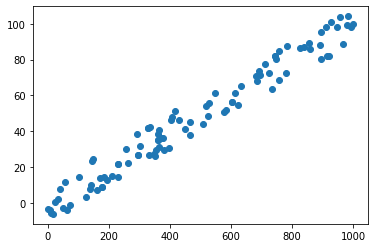

In [4]:
plt.scatter(data_test[:, 0], data_test[:, -1])
plt.show()

## Create PyTorch model

In [5]:
class SimpleLinearRegressionModel(torch.nn.Module):
  def __init__(self, input_features_n: int, output_features_n: int):
    super(SimpleLinearRegressionModel, self).__init__()

    # Create layers
    self.linear = torch.nn.Linear(input_features_n, output_features_n)

  def forward(self, data: torch.Tensor):
    # Connect layers
    y = self.linear(data)
    return y

In [6]:
# Create the model
model = SimpleLinearRegressionModel(1, 1)

# If GPU is present, move the model to the GPU
if torch.cuda.is_available():
  model = model.cuda()
  print("Using GPU")
else:
  print("Using CPU")

Using GPU


## Choose loss function and optimizer

In [7]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.000001)

## Train the model

In [8]:
x = Variable(torch.from_numpy(data_train[:, 0].reshape(-1, 1)), requires_grad=False)
y = Variable(torch.from_numpy(data_train[:, 1].reshape(-1, 1)), requires_grad=False)
if torch.cuda.is_available():
  x = x.cuda()
  y = y.cuda()

for epoch in range(1, 10+1):
  optimizer.zero_grad()
  outputs = model(x)

  loss = criterion(outputs, y)

  # Calculate gradients
  loss.backward()

  # Run the optimizer
  optimizer.step()

  print(f"Epoch: {epoch}, loss: {loss.item()}")

Epoch: 1, loss: 390149.46875
Epoch: 2, loss: 28297.236328125
Epoch: 3, loss: 2081.339599609375
Epoch: 4, loss: 182.01829528808594
Epoch: 5, loss: 44.41397476196289
Epoch: 6, loss: 34.44462203979492
Epoch: 7, loss: 33.722347259521484
Epoch: 8, loss: 33.67001724243164
Epoch: 9, loss: 33.66623306274414
Epoch: 10, loss: 33.66595458984375


## Test the model

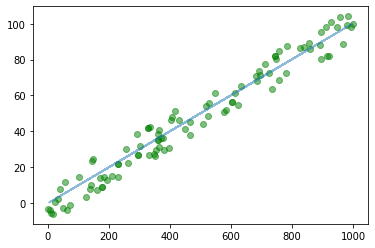

In [9]:
x_test = Variable(torch.from_numpy(data_test[:, 0].reshape(-1, 1)))
y_test = Variable(torch.from_numpy(data_test[:, 1].reshape(-1, 1)))

if torch.cuda.is_available():
  x_test = x_test.cuda()

y_predicted = model(x_test)

if torch.cuda.is_available():
  x_test = x_test.cpu()
  y_predicted = y_predicted.cpu()
  

y_predicted = y_predicted.data.numpy()
plt.clf()
plt.plot(x_test, y_test, 'go', alpha=0.5)
plt.plot(x_test, y_predicted, '--', alpha=0.5)
plt.show()